# STATUS: WIP
work in progress. Not worth reading yet. more notes than anything else.

# It´s About Time

Say you are a weather forecaster, charged with producing a prediction of the weather, perhaps for the public, or perhaps for a vertical domain, such as aviation, or transport. In normal situations, the forecaster will be asked to produce a forecast at a specific time of day, to help her clients plan their business.

How does a forecaster build a forecast? 

Assuming the forecaster is in the americas, one could use a browser:

* look at a picture of the sky from a GOES satellite image (visible spectrum), to see where it is cloudy at the moment.
* look at a different web site for closer in shots from polar orbiting satellites (e.g. HRDPS) that cover a smaller area.
* look at a United States Geological Survey, or Water Survey of Canada web site to see the current stream flows.
* look at a some weather web sites, to see the current observations from surface stations.
* look at some Aviation (FAA or NAVCANADA web sites) to find weather observations at airports (which tend to have a tightly controlled quality, and so are relatively reliable.)
* Find RADAR imagery on the net for the areas of interest (it might be that two or three RADAR stations have coverage of the area one is looking at.

If you want to look at all that information together... you build a really large spreadsheet where each cell describes one part of the sky, and for each cell, you would store something like temperature, barometric pressure, and wind (direction and speed.)


Now to get movement, you need to be looking at a trend, not just a snapshot.  
From one picture, you don´t know the direction that anything is moving. 
So you really need at least two snapshots to get speed.

Cloud is a one location, p0 at an initial time, and and has moved to p1 at time t1.

In [ ]:
#illustration with two points.


Now to predict the future, with just two points in time, you have to assume stuff is always moving at the same speed. If you think air masses are accellerating or slowing down, you need another picture. With three of them you can compare the speeds between the first two pictures, and the last two pictures, and see a change in speed.


In [ ]:
#illustration with three points.

Now with three points, you have constant accelleration... but if the acceleration itself is varying, then you need more again.

The more points in time you have, the better you can understand the movement to establish the wind speed and direction at a given point in time, and how it will change in future.

So once you have good information about the clouds that exist, and the rate they are moving at, and whether they are speeding up, or building up, or dissipating... then a forecaster is trained in physics, and applies the rules of physics to understand how clouds will move in the future.   Essentially it uses the spreadsheet to calculate what the sky should look like one small step later in time, and then another step, and another, until you have arrived as far in time as needed for the forecast product.

At this point, the result is a spreadsheet. The forecaster then can use the spreadsheet and write descriptions of weather for their client, or have an automated process do that, or produce simulated ¨satellite" imagery to show where the clouds till in the future.

Restating things:

* step 1: Acquisiion: gather a time series of data for kinds of data.
* step 2: Assimilation: put all the different data into a pile of spreadsheets.
* step 3: Numerical Model: hit calculate on the spreadsheet for the number of timestesp you need.
* step 4: Services: translating the spreadsheets back into things people can understand (maps, text, and simulated future images.)


Looking at all these steps, it is obvious that they are extremely tedious for a human to do, and things that a computer, in principle should be great at. Rather than having a human look at web sites, and extract data,
have a computer do it, and present the forecaster with a best first guess product.

## Let the Computer Do It

Instead of a human browsing dozens of web sites and mapping stuff into a spreadsheet manually, and then hitting calculate, and then mapping back the spreadsheet back to something his clients will understand, the forecaster hits a button, and has the computer does all the tedious work. So when the forecaster pushes the button, the computer:

* scans the entire world for a number of hours of satellite, RADAR, and point observations from weather stations, airports, ships, and planes.  looking for information for the last hour or two to get a good trend.
* stuffs that into a spreadsheet.
* runs the spreadsheet.
* extracts the interesting numbers or pictures from the spreadsheet.

Great, how long will that take, and how good will the result be?

Well the quality of the result will vary with the quality of the input. To make a spreadsheet, the forecaster decides how big an volume of space to cover with each cell. The bigger the volume covered by each cell, the more you are taking different data points and averaging them to get one value for the the cell, so the "fuzzier" the pictures that result.  

How big are the spreadsheets? 30 years ago, the "high resolution" spreadsheet covering North America had each cell was 150 km. on a side, At that time, computers were not big enough to cover the whole world. Today, the high resolution models are around 10km on a side (100 sq. km.) As the area of the earth is around 500 million sq. km. that means that the grid today should be about 5 million cells. per level, models typically have 25 levels representing different heights of air in the atmosphere, so that means 125 million cells to calculate.


In [5]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Acquisition", Start='12:05:00', Finish='12:45:00'),
    dict(Task="Assimilation", Start='12:45:00', Finish='13:05:00'),
    dict(Task="Model", Start='13:05:00', Finish='13:45:00'),
    dict(Task="Services", Start='13:45:00', Finish='14:10:00')
    
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

/home/peter/.local/lib/python3.10/site-packages/plotly/express/_core.py:1753: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/home/peter/.local/lib/python3.10/site-packages/plotly/express/_core.py:1754: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Each cell has information about different phenomena, called variables, say 25 of them. so to get a full picture, one needs 125 million x 25 variables x 8 bytes per variable = 6.2 billion variables in about 50 gbytes of memory.  To calculate the what the values of those variables are at the next unit in time involve many calculations using that data, and the prediction's accuracy involves some tradeoffs:

The simpler the model, the simpler the math, the less calculation time to get a result. The more complicated the model & math, the better the result, but the longer it takes to do.

* https://en.wikipedia.org/wiki/History_of_numerical_weather_prediction#cite_note-RFE-43 note on Weather model from 1989

* 
https://devops.com/dont-build-microservices-pursue-loose-coupling/


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
    

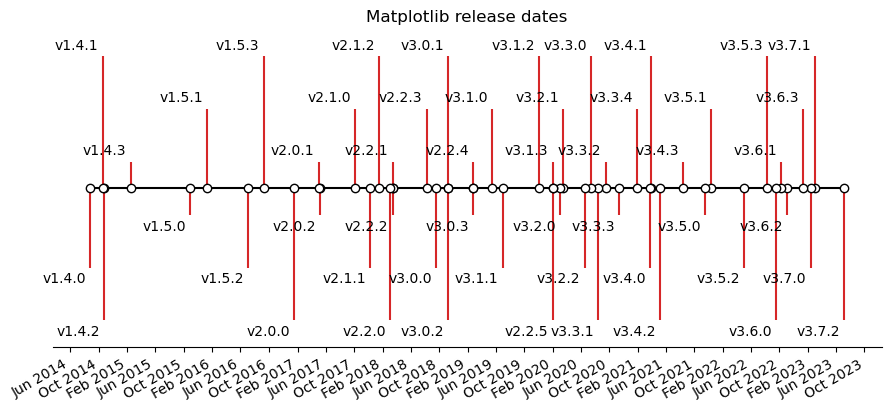

In [3]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# from https://www.datacamp.com/tutorial/how-to-make-gantt-chart-in-python-matplotlib



In [11]:
df = pd.DataFrame({'task': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
                  'team': ['R&D', 'Accounting', 'Sales', 'Sales', 'IT', 'R&D', 'IT', 'Sales', 'Accounting', 'Accounting', 'Sales', 'IT'],
                  'start': pd.to_datetime(['20 Oct 2022', '24 Oct 2022', '26 Oct 2022', '31 Oct 2022', '3 Nov 2022', '7 Nov 2022', '10 Nov 2022', '14 Nov 2022', '18 Nov 2022', '23 Nov 2022', '28 Nov 2022', '30 Nov 2022']),
                  'end': pd.to_datetime(['31 Oct 2022', '28 Oct 2022', '31 Oct 2022', '8 Nov 2022', '9 Nov 2022', '18 Nov 2022', '17 Nov 2022', '22 Nov 2022', '23 Nov 2022', '1 Dec 2022', '5 Dec 2022', '5 Dec 2022']),
                  'completion_frac': [1, 1, 1, 1, 1, 0.95, 0.7, 0.35, 0.1, 0, 0, 0]})
print(df)

   task        team      start        end  completion_frac
0     A         R&D 2022-10-20 2022-10-31             1.00
1     B  Accounting 2022-10-24 2022-10-28             1.00
2     C       Sales 2022-10-26 2022-10-31             1.00
3     D       Sales 2022-10-31 2022-11-08             1.00
4     E          IT 2022-11-03 2022-11-09             1.00
5     F         R&D 2022-11-07 2022-11-18             0.95
6     G          IT 2022-11-10 2022-11-17             0.70
7     H       Sales 2022-11-14 2022-11-22             0.35
8     I  Accounting 2022-11-18 2022-11-23             0.10
9     J  Accounting 2022-11-23 2022-12-01             0.00
10    K       Sales 2022-11-28 2022-12-05             0.00
11    L          IT 2022-11-30 2022-12-05             0.00


In [17]:
df['days_to_start'] = (df['start'] - df['start'].min()).dt.days
df['days_to_end'] = (df['end'] - df['start'].min()).dt.days
df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1  # to include also the end date
df['completion_days'] = df['completion_frac'] * df['task_duration']
print(df)

   task        team      start        end  completion_frac  days_to_start  \
0     A         R&D 2022-10-20 2022-10-31             1.00              0   
1     B  Accounting 2022-10-24 2022-10-28             1.00              4   
2     C       Sales 2022-10-26 2022-10-31             1.00              6   
3     D       Sales 2022-10-31 2022-11-08             1.00             11   
4     E          IT 2022-11-03 2022-11-09             1.00             14   
5     F         R&D 2022-11-07 2022-11-18             0.95             18   
6     G          IT 2022-11-10 2022-11-17             0.70             21   
7     H       Sales 2022-11-14 2022-11-22             0.35             25   
8     I  Accounting 2022-11-18 2022-11-23             0.10             29   
9     J  Accounting 2022-11-23 2022-12-01             0.00             34   
10    K       Sales 2022-11-28 2022-12-05             0.00             39   
11    L          IT 2022-11-30 2022-12-05             0.00             41   

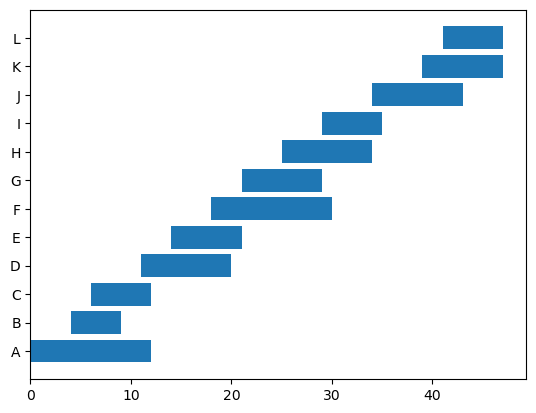

In [18]:
plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'])
plt.show()

In [3]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [70]:
import plotly.express as px
import copy
import pandas as pd
import datetime as dt

today=dt.datetime.now()
first_task_start=dt.time(hour=12,minute=5)
time_of_start=today.combine(today,first_task_start)

df = pd.DataFrame([
    dict(Task="Acquisition", Start_time=time_of_start, Duration='00:40:00', End_time=today),
    dict(Task="GOES images T-12", Start_with='Acquisition', Duration='00:05:00', End_time=today),
    dict(Task="GOES images T-11", Start_after='GOES images T-12', Duration='00:05:00', End_time=today),
    dict(Task="GOES images T-10", Start_after='GOES images T-11', Duration='00:05:00', End_time=today),
    dict(Task="GOES images T-09", Start_after='GOES images T-10', Duration='00:05:00', End_time=today),
    dict(Task="Assimilation", Start_after='Acquisition', Duration='00:30:00'),
    dict(Task="Model", Start_after='Assimilation', Duration='00:45:00')
])

df['Duration']=pd.to_timedelta(df['Duration'])

for ti in df.index:
    if pd.isna(df['Start_time'][ti]):
        for predecessor in df.index:
            if df['Task'][predecessor] == df['Start_after'][ti]:
                df.loc[ti, 'Start_time'] = df['End_time'][predecessor]
            elif df['Task'][predecessor] == df['Start_with'][ti]:
                df.loc[ti, 'Start_time'] = df['Start_time'][predecessor]
    else:
        pd.to_datetime(df['Start_time'][ti])

    df.loc[ti, 'End_time'] = df['Start_time'][ti]+df['Duration'][ti]


print(df)


fig = px.timeline(df, x_start="Start_time", x_end="End_time", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

               Task          Start_time        Duration            End_time  \
0       Acquisition 2023-09-08 12:05:00 0 days 00:40:00 2023-09-08 12:45:00   
1  GOES images T-12 2023-09-08 12:05:00 0 days 00:05:00 2023-09-08 12:10:00   
2  GOES images T-11 2023-09-08 12:10:00 0 days 00:05:00 2023-09-08 12:15:00   
3  GOES images T-10 2023-09-08 12:15:00 0 days 00:05:00 2023-09-08 12:20:00   
4  GOES images T-09 2023-09-08 12:20:00 0 days 00:05:00 2023-09-08 12:25:00   
5      Assimilation 2023-09-08 12:45:00 0 days 00:30:00 2023-09-08 13:15:00   
6             Model 2023-09-08 13:15:00 0 days 00:45:00 2023-09-08 14:00:00   

    Start_with       Start_after  
0          NaN               NaN  
1  Acquisition               NaN  
2          NaN  GOES images T-12  
3          NaN  GOES images T-11  
4          NaN  GOES images T-10  
5          NaN       Acquisition  
6          NaN      Assimilation  


/home/peter/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [71]:
import plotly.express as px

# Create a simple line plot
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 1, 6, 3]}
fig = px.line(data, x='x', y='y')

# Display the plot
fig.show()